In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("20220305_log.csv")
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z
0,0.001,-0.001,1.003,-0.003,0.001,0.000
1,0.004,-0.001,1.000,-0.003,0.005,0.001
2,0.001,-0.000,1.007,-0.000,0.001,0.000
3,-0.000,-0.000,0.994,-0.000,0.003,0.006
4,-0.001,-0.001,0.998,0.004,-0.004,0.000
...,...,...,...,...,...,...
1730,0.003,-0.064,1.006,0.018,0.005,0.005
1731,-0.000,-0.029,0.994,-0.002,0.005,0.005
1732,-0.003,-0.047,1.013,0.009,0.001,-0.002
1733,-0.002,-0.039,0.998,-0.003,-0.001,0.005


In [7]:
num = len(df)
df["roll"] = [np.degrees(np.arctan2(df["acc_y"][i], df["acc_z"][i])) for i in range(num)]
df["pitch"] = [-np.degrees(np.arctan2(df["acc_x"][i], np.sqrt(df["acc_y"][i]**2+df["acc_z"][i]**2))) for i in range(num)]
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,roll,pitch
0,0.001,-0.001,1.003,-0.003,0.001,0.000,-0.057124,-0.057124
1,0.004,-0.001,1.000,-0.003,0.005,0.001,-0.057296,-0.229182
2,0.001,-0.000,1.007,-0.000,0.001,0.000,-0.000000,-0.056897
3,-0.000,-0.000,0.994,-0.000,0.003,0.006,-0.000000,0.000000
4,-0.001,-0.001,0.998,0.004,-0.004,0.000,-0.057411,0.057411
...,...,...,...,...,...,...,...,...
1730,0.003,-0.064,1.006,0.018,0.005,0.005,-3.640154,-0.170517
1731,-0.000,-0.029,0.994,-0.002,0.005,0.005,-1.671133,0.000000
1732,-0.003,-0.047,1.013,0.009,0.001,-0.002,-2.656438,0.169499
1733,-0.002,-0.039,0.998,-0.003,-0.001,0.005,-2.237875,0.114733


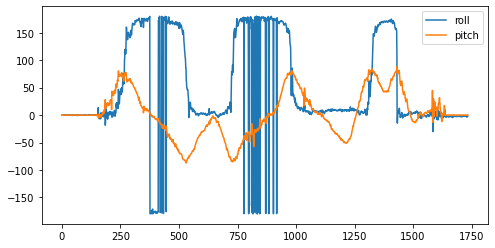

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(df["roll"], label="roll")
ax.plot(df["pitch"], label="pitch")
ax.legend()

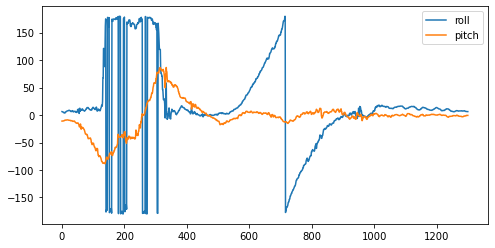

In [16]:
df2 = pd.read_csv("udp_log_20220305-222702.csv")
num2 = len(df2)
df2["roll"] = [np.degrees(np.arctan2(df2["acc_y"][i], df2["acc_z"][i])) for i in range(num2)]
df2["pitch"] = [-np.degrees(np.arctan2(df2["acc_x"][i], np.sqrt(df2["acc_y"][i]**2+df2["acc_z"][i]**2))) for i in range(num2)]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(df2["roll"], label="roll")
ax.plot(df2["pitch"], label="pitch")
ax.legend()

In [29]:
print(num2)

1301


In [30]:
df2

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,roll,pitch,pitch_gyro
0,0.183,0.103,0.936,0.081,0.029,0.132,6.279718,-10.997758,0
1,0.182,0.102,0.943,0.069,0.039,0.129,6.173421,-10.861996,0
2,0.183,0.098,0.949,0.041,0.062,0.111,5.895842,-10.858276,0
3,0.187,0.092,0.962,0.010,0.078,0.073,5.462816,-10.951602,0
4,0.185,0.082,0.970,-0.022,0.082,0.044,4.832072,-10.760389,0
...,...,...,...,...,...,...,...,...,...
1296,0.011,0.114,1.018,0.027,0.045,0.037,6.389606,-0.615240,0
1297,0.011,0.114,1.018,0.037,0.038,0.039,6.389606,-0.615240,0
1298,0.011,0.110,1.007,0.046,0.029,0.037,6.234008,-0.622147,0
1299,0.011,0.110,1.007,0.053,0.024,0.035,6.234008,-0.622147,0


<ipython-input-32-612b8f9414c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pitch_gyro"][1:] = [-np.degrees(df2["gyr_y"][i]*dt + df2["pitch_gyro"][i-1]) for i in range(1, num2)]


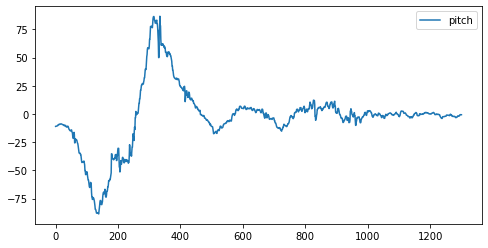

In [32]:
# df2["roll"] = [np.degrees(np.arctan2(df2["acc_y"][i], df2["acc_z"][i])) for i in range(num)]
# df2["pitch"] = [-np.degrees(np.arctan2(df2["acc_x"][i], np.sqrt(df2["acc_y"][i]**2+df2["acc_z"][i]**2))) for i in range(num)]
dt = 0.01
df2["pitch_gyro"] = 0
df2["pitch_gyro"][1:] = [-np.degrees(df2["gyr_y"][i]*dt + df2["pitch_gyro"][i-1]) for i in range(1, num2)]
fig, ax2 = plt.subplots(1, 1, figsize=(8, 4))
ax2.plot(df2["pitch"], label="pitch")
ax2.legend()

In [43]:
# np.linspace(650, 2350, 181)
a_ = np.linspace(0, 180, 181)
# a_[90]
print(a_)


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.]


In [45]:
print(np.flipud(a_))
# len(df2)

[180. 179. 178. 177. 176. 175. 174. 173. 172. 171. 170. 169. 168. 167.
 166. 165. 164. 163. 162. 161. 160. 159. 158. 157. 156. 155. 154. 153.
 152. 151. 150. 149. 148. 147. 146. 145. 144. 143. 142. 141. 140. 139.
 138. 137. 136. 135. 134. 133. 132. 131. 130. 129. 128. 127. 126. 125.
 124. 123. 122. 121. 120. 119. 118. 117. 116. 115. 114. 113. 112. 111.
 110. 109. 108. 107. 106. 105. 104. 103. 102. 101. 100.  99.  98.  97.
  96.  95.  94.  93.  92.  91.  90.  89.  88.  87.  86.  85.  84.  83.
  82.  81.  80.  79.  78.  77.  76.  75.  74.  73.  72.  71.  70.  69.
  68.  67.  66.  65.  64.  63.  62.  61.  60.  59.  58.  57.  56.  55.
  54.  53.  52.  51.  50.  49.  48.  47.  46.  45.  44.  43.  42.  41.
  40.  39.  38.  37.  36.  35.  34.  33.  32.  31.  30.  29.  28.  27.
  26.  25.  24.  23.  22.  21.  20.  19.  18.  17.  16.  15.  14.  13.
  12.  11.  10.   9.   8.   7.   6.   5.   4.   3.   2.   1.   0.]


In [28]:
len([-np.degrees(df2["gyr_y"][i]*dt + df2["pitch_gyro"][i-1]) for i in range(1, num2+1)])

KeyError: 1301